# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

**Análise do Impacto das Taxas de Exportação de Carne no Preço da Arroba do Boi no Estado de São Paulo**


Este projeto visa explorar a relação entre as taxas de exportação de carne e o preço da arroba do boi no estado de São Paulo desde o ano 2000. Utilizando dados históricos disponíveis, serão realizadas análises comparativas para entender como variações nas taxas de exportação influenciam diretamente o mercado interno de bovinos neste estado ao longo das últimas duas décadas. A análise incluirá visualizações detalhadas, insights sobre correlações temporais e uma investigação das principais tendências econômicas e políticas que possam ter afetado o setor. Este estudo não só busca fornecer insights valiosos para stakeholders do agronegócio paulista, mas também servir como base para futuras análises de mercado e políticas públicas relacionadas ao setor pecuário em São Paulo.

Essa versão ajustada reflete o período de análise a partir do ano 2000, fornecendo uma visão ampla e detalhada das dinâmicas entre as taxas de exportação de carne e os preços da arroba do boi no estado de São Paulo ao longo das últimas duas décadas.

Os dados de exportação de carne foram obtidos através do site do  [Ministério da Economia, Indústria, Comércio Exterior e Serviços do Brasil](https://comexstat.mdic.gov.br/pt/geral). Utilizando essa fonte oficial, foram coletadas informações detalhadas sobre as quantidades das exportações de carne ao longo do período analisado.

Para analisar a variação do preço da arroba do boi, os dados foram coletados do  [Centro de Estudos Avançados em Economia Aplicada (CEPEA) da Escola Superior de Agricultura Luiz de Queiroz (ESALQ/USP)](https://www.cepea.esalq.usp.br/br/consultas-ao-banco-de-dados-do-site.aspx).

Antes de serem importados para o Google Colab para análise, os dados de ambas as fontes passaram por um processo de tratamento, limpeza e filtragem nos respectivos arquivos Excel.

## 2\. Pacotes e bibliotecas

In [ ]:
import pandas as pd
from openpyxl import load_workbook
import csv
import seaborn as sns
import matplotlib.pyplot as plt


## 3\. Exploração de dados

**Carregamento dos Dados de Exportação de Carne Bovina**




In [ ]:

export_df = pd.read_csv('export_car_bov_kg_2000_a_2023.csv', sep=';')
export_df['Mês'] = export_df['Mês'].str.split('. ', expand=True)[1]
meses_dict = {
    'Janeiro': '01', 'Fevereiro': '02', 'Março': '03', 'Abril': '04', 'Maio': '05', 'Junho': '06',
    'Julho': '07', 'Agosto': '08', 'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'
}
export_df['Ano-Mês'] = pd.to_datetime(export_df['Ano'].astype(str) + '-' + export_df['Mês'].map(meses_dict), format='%Y-%m')
export_df = export_df.sort_values(by='Ano-Mês').reset_index(drop=True)
export_df['Toneladas'] = export_df['Quilograma Líquido'] / 1000
export_df = export_df.drop(columns=['Quilograma Líquido', 'Ano-Mês'])
print(export_df.head())
print(export_df.shape)


**Carregamento do DataFrame de Preços da Arroba de São Paulo**


In [ ]:
valor_sp_2000_a_2023 = load_workbook(filename='BoiGordo_SP_2000_a_2023.xlsx')
planilha = valor_sp_2000_a_2023.active

In [ ]:
with open('BoiGordo_SP_2000_a_2023.csv', 'w', newline='', encoding='utf-8') as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv)
    for linha in planilha.iter_rows(values_only=True):
        valores_formatados = []
        for valor in linha:
            if isinstance(valor, (int, float)) and valor == int(valor):
                valores_formatados.append(int(valor))
            else:
                valores_formatados.append(valor)
        escritor_csv.writerow(valores_formatados)

In [ ]:
valor_sp_df = pd.read_csv('BoiGordo_SP_2000_a_2023.csv', sep=',')
valor_sp_df['Ano'] = pd.to_numeric(valor_sp_df['Ano'], errors='coerce').fillna(0).astype(int)
print(valor_sp_df.head())

## 4\. Manipulação

**Variação Anual no Volume de Exportação de Carne Bovina Brasileira**

In [ ]:
export = export_df[["Ano", "Toneladas"]]
export = export.groupby("Ano").agg("sum").reset_index()
export.head(30)

**Variação Anual no Preço do @ do Boi no estado de São Paulo**

In [ ]:
preco = valor_sp_df[["Ano", "À vista R$"]]
preco = preco.groupby("Ano").agg("mean").reset_index()
preco["À vista R$"] = preco["À vista R$"].round(2)
preco.head(30)

## 5\. Visualização

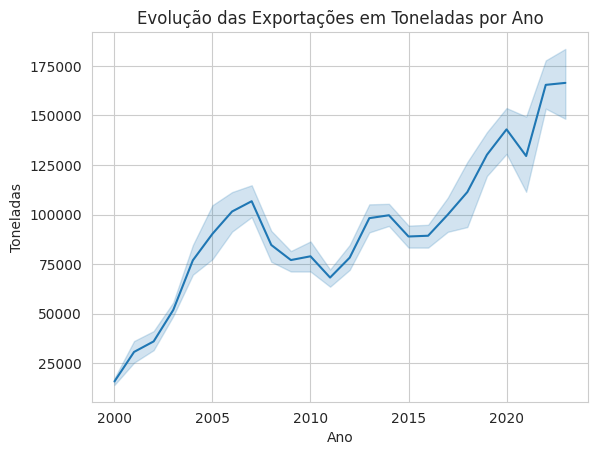

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(export_df, x='Ano', y='Toneladas')
    grafico.set(title='Evolução das Exportações em Toneladas por Ano', xlabel='Ano', ylabel='Toneladas')

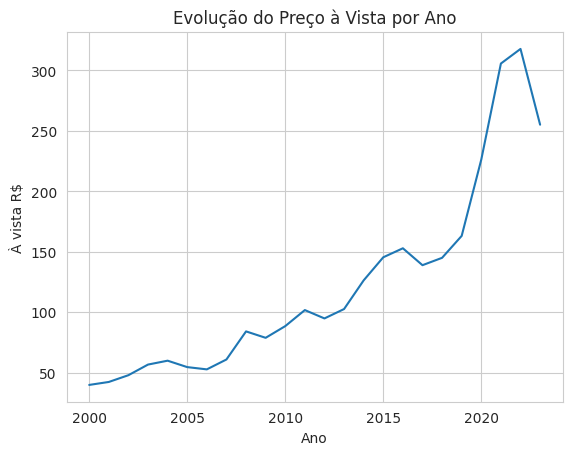

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(data=preco, x='Ano', y='À vista R$')
    grafico.set(title='Evolução do Preço à Vista por Ano', xlabel='Ano', ylabel='À vista R$')

# Exibir o gráfico
plt.show()

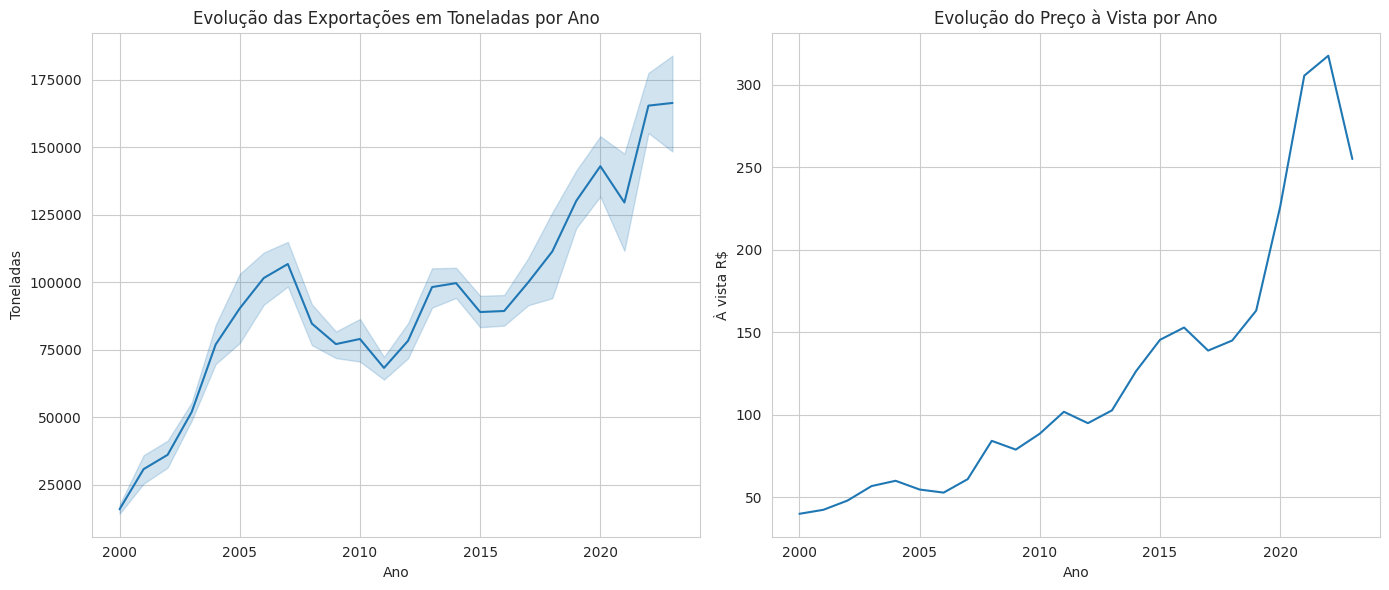

In [ ]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.lineplot(data=export_df, x='Ano', y='Toneladas', ax=ax1)
ax1.set(title='Evolução das Exportações em Toneladas por Ano', xlabel='Ano', ylabel='Toneladas')
sns.lineplot(data=preco, x='Ano', y='À vista R$', ax=ax2)
ax2.set(title='Evolução do Preço à Vista por Ano', xlabel='Ano', ylabel='À vista R$')
plt.tight_layout()
plt.show()

**Evolução das Exportações em Toneladas e Preço à Vista por Ano**

Dada a discrepância nos números entre as toneladas exportadas e o preço da arroba do boi, o gráfico de barras agrupadas pode mostrar o total anual de toneladas exportadas ao lado do preço médio anual da arroba, facilitando a comparação direta dos valores absolutos.

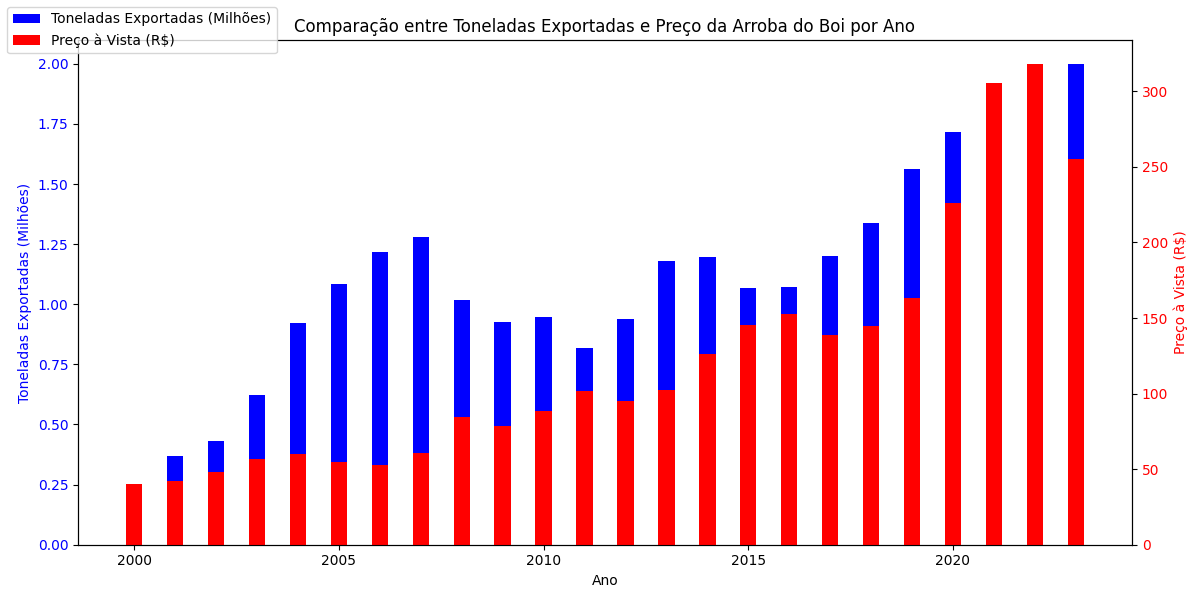

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(export['Ano'], export['Toneladas'] / 1e6, color='b', width=0.4, label='Toneladas Exportadas (Milhões)')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Toneladas Exportadas (Milhões)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.bar(preco['Ano'], preco['À vista R$'], color='r', width=0.4, label='Preço à Vista (R$)')
ax2.set_ylabel('Preço à Vista (R$)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Comparação entre Toneladas Exportadas e Preço da Arroba do Boi por Ano')
fig.legend(loc='upper left')
plt.tight_layout()
plt.show()

Para que fique ainda mais claro a correlação entre o volume de exportação de carne bovina brasileira e o preço médio da arroba do boi, vamos calcular o coeficiente de correlação. Esse coeficiente varia de -1 a 1, onde:

•	**Correlação positiva (próxima de +1)**: Indica que à medida que uma variável aumenta, a outra também tende a aumentar.

•	**Correlação negativa (próxima de -1)**: Indica que à medida que uma variável aumenta, a outra tende a diminuir.

•	**Correlação próxima de 0**: Indica que não há uma relação linear forte entre as variáveis.


In [ ]:
correlation = export['Toneladas'].corr(preco['À vista R$'])

print(f"Coeficiente de correlação entre Toneladas Exportadas e Preço à Vista do Boi: {correlation:.2f}")

Coeficiente de correlação entre Toneladas Exportadas e Preço à Vista do Boi: 0.84


# Insights sobre a coleta e visualização dos dados


Ao longo das últimas duas décadas, observa-se um crescimento contínuo no volume de exportação de carne bovina brasileira, com um notável aumento após 2010.

A análise revela a relação entre as exportações de carne bovina e o preço da arroba do boi em São Paulo. Variações no volume exportado podem influenciar os preços internos.

Em 2005 houve um pico de exportação, ano em que a valorização do Real frente ao Dólar americano tornou os produtos brasileiros mais competitivos globalmente, aumentando significativamente as exportações.

Existe uma correlação forte (0,84) entre o volume de exportação de carne bovina e o preço à vista da arroba do boi, sugerindo uma associação positiva direta ao longo do período analisado.

A queda brusca no preço da arroba do boi em dezembro de 2021 pode ter sido influenciada pela crise global da COVID-19, que impactou mercados de commodities como a carne bovina devido a restrições de mobilidade e mudanças nos padrões de consumo.

Esses insights destacam como fatores econômicos globais e domésticos podem moldar o mercado de carne bovina brasileiro ao longo do tempo, influenciando tanto exportações quanto preços internos.